In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats as ss
import math
import random
from sklearn.ensemble import RandomForestRegressor
from itertools import combinations
import pygad

## 

In [150]:
heart_rate = np.array([68, 71, 67, 69, 71, 70, 69, 67, 70, 70, 79, 79, 78, 78, 78, 79, 79, 82, 82, 81])

### a.

In [151]:
lamb = 0.1
L = 2.81
mu = 70
sigma = 3
x = heart_rate.copy()
z = np.array([lamb*x[1] + (1-lamb)*mu])
LCL = [mu - L*sigma*np.sqrt(lamb*(1/(2-lamb))*(1-np.power(1-lamb, 2)))]
UCL = [mu + L*sigma*np.sqrt(lamb*(1/(2-lamb))*(1-np.power(1-lamb, 2)))]
for i in range(1, len(x)):
    z_i = lamb*x[i] + (1-lamb)*z[i-1]
    z = np.append(z, z_i)
    interval = L*sigma_hat*np.sqrt(lamb*(1/(2-lamb))*(1-np.power(1-lamb, 2*(i+1))))
    LCL.append(mu - interval)
    UCL.append(mu + interval)

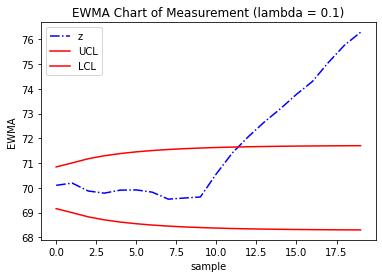

In [152]:
plt.plot(range(len(x)), z, 'b-.', label = 'z')
plt.plot(range(len(x)), UCL, 'r-', label = 'UCL')
plt.plot(range(len(x)), LCL, 'r-', label = 'LCL')
plt.title('EWMA Chart of Measurement (lambda = 0.1)')
plt.xlabel('sample')
plt.ylabel('EWMA')
plt.legend()

### b.

In [325]:
lamb = 0.5
L = 3.07
mu = 70
sigma = 3
x = heart_rate.copy()
z = np.array([lamb*x[1] + (1-lamb)*mu])
LCL = [mu - L*sigma*np.sqrt(lamb*(1/(2-lamb))*(1-np.power(1-lamb, 2)))]
UCL = [mu + L*sigma*np.sqrt(lamb*(1/(2-lamb))*(1-np.power(1-lamb, 2)))]
for i in range(1, len(x)):
    z_i = lamb*x[i] + (1-lamb)*z[i-1]
    z = np.append(z, z_i)
    interval = L*sigma_hat*np.sqrt(lamb*(1/(2-lamb))*(1-np.power(1-lamb, 2*(i+1))))
    LCL.append(mu - interval)
    UCL.append(mu + interval)

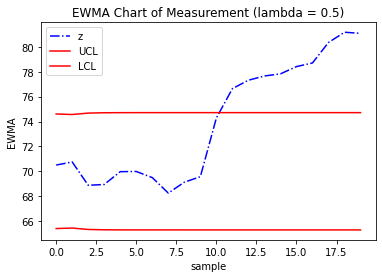

In [326]:
plt.plot(range(len(x)), z, 'b-.', label = 'z')
plt.plot(range(len(x)), UCL, 'r-', label = 'UCL')
plt.plot(range(len(x)), LCL, 'r-', label = 'LCL')
plt.title('EWMA Chart of Measurement (lambda = 0.5)')
plt.xlabel('sample')
plt.ylabel('EWMA')
plt.legend()

### c.

In [373]:
lamb = 0.1
L = 2.81
mu = 70
sigma = 3
UCL = mu + L*sigma*np.sqrt(lamb*(1/(2-lamb))*(1-np.power(1-lamb, 2*20)))
LCL = mu - L*sigma*np.sqrt(lamb*(1/(2-lamb))*(1-np.power(1-lamb, 2*20)))
value_1 = (76 - UCL) / sigma
value_2 = (76 - LCL) / sigma
prob_1 = ss.norm.cdf(value_1)
prob_2 = 1 - ss.norm.cdf(value_2)
prob = prob_1 + prob_2
arl = 1/prob
print('Lambda = 0.1 \nL = 2.81 \nARL = ', arl)

Lambda = 0.1 
L = 2.81 
ARL =  1.0902135986818622


In [383]:
lamb = 0.5
L = 3.07
mu = 70
sigma = 3
UCL = mu + L*sigma*np.sqrt(lamb*(1/(2-lamb))*(1-np.power(1-lamb, 2*20)))
LCL = mu - L*sigma*np.sqrt(lamb*(1/(2-lamb))*(1-np.power(1-lamb, 2*20)))
value_1 = (76 - UCL) / sigma
value_2 = (76 - LCL) / sigma
prob_1 = ss.norm.cdf(value_1)
prob_2 = 1 - ss.norm.cdf(value_2)
prob = prob_1 + prob_2
arl = 1/prob
print('Lambda = 0.5 \nL = 3.07 \nARL = ', arl)

Lambda = 0.5 
L = 3.07 
ARL =  1.694694610934247


### d.

In [401]:
lamb = 0.1
L = 2.81
mu = 70
sigma = 3
shift = lamb*76 + (1-lamb)*mu
UCL = mu + L*sigma*np.sqrt(lamb*(1/(2-lamb))*(1-np.power(1-lamb, 2*20)))
value = (shift - UCL) / sigma
prob = ss.norm.cdf(value)
print('Lambda = 0.1 \nL = 2.81 \nProbability = ', prob)

Lambda = 0.1 
L = 2.81 
Probability =  0.3300133991696962


In [402]:
lamb = 0.5
L = 3.07
mu = 70
sigma = 3
shift = lamb*76 + (1-lamb)*mu
UCL = mu + L*sigma*np.sqrt(lamb*(1/(2-lamb))*(1-np.power(1-lamb, 2*20)))
value = (shift - UCL) / sigma
prob = ss.norm.cdf(value)
print('Lambda = 0.5 \nL = 3.07 \nProbability = ', prob)

Lambda = 0.5 
L = 3.07 
Probability =  0.2199194377820901


### e.

In [397]:
lamb = 0.1
L = 2.81
mu = 70
sigma = 3
shift = lamb*76 + (1-lamb)*mu
shift_2 = lamb*76 + (1-lamb)*shift
UCL = mu + L*sigma*np.sqrt(lamb*(1/(2-lamb))*(1-np.power(1-lamb, 2*20)))
value_1 = (shift - UCL) / sigma
value_2 = (shift_2 - UCL) / sigma
prob_1 = 1 - ss.norm.cdf(value_1)
prob_2 = 1 - ss.norm.cdf(value_2)
prob = prob_1 - prob_2
print('Lambda = 0.1 \nL = 2.81 \nProbability = ', prob)

Lambda = 0.1 
L = 2.81 
Probability =  0.06746624876705365


In [398]:
lamb = 0.5
L = 3.07
mu = 70
sigma = 3
shift = lamb*76 + (1-lamb)*mu
shift_2 = lamb*76 + (1-lamb)*shift
UCL = mu + L*sigma*np.sqrt(lamb*(1/(2-lamb))*(1-np.power(1-lamb, 2*20)))
value_1 = (shift - UCL) / sigma
value_2 = (shift_2 - UCL) / sigma
prob_1 = 1 - ss.norm.cdf(value_1)
prob_2 = 1 - ss.norm.cdf(value_2)
prob = prob_1 - prob_2
print('Lambda = 0.5 \nL = 3.07 \nProbability = ', prob)

Lambda = 0.5 
L = 3.07 
Probability =  0.17271268651028482


## 

In [403]:
train = pd.read_csv('train.txt', sep = ' ', header = None).iloc[:, :26]
temp_1 = ['unit number', 'time in cycles']
temp_2 = ['operational setting ' + str(i) for i in range(1, 4)]
temp_3 = ['sensor measurement ' + str(i) for i in range(1, 22)]
colnames = temp_1 + temp_2 + temp_3
target = train[train[0] == 1]
target.columns = colnames

### a.

In [209]:
max_time = target['time in cycles'].max()
rul = (max_time - target['time in cycles']) / max_time
print(rul)

0      0.995516
1      0.991031
2      0.986547
3      0.982063
4      0.977578
         ...   
218    0.017937
219    0.013453
220    0.008969
221    0.004484
222    0.000000
Name: time in cycles, Length: 223, dtype: float64


### b.

In [406]:
variation = target.apply(lambda x: np.std(x) / np.mean(x), axis = 0)
max_sensor = variation[2:].argmax()
min_sensor = variation[2:].argmin()
print(variation[2:])
print('\nmaximum coefficient of variation: ', colnames[2:][max_sensor])
print('minimum coefficient of variation: ', colnames[2:][min_sensor])

operational setting 1    0.566049
operational setting 2    0.499142
operational setting 3    0.604875
sensor measurement 1     0.053701
sensor measurement 2     0.063732
sensor measurement 3     0.075496
sensor measurement 4     0.099268
sensor measurement 5     0.446337
sensor measurement 6     0.468595
sensor measurement 7     0.526972
sensor measurement 8     0.071340
sensor measurement 9     0.039942
sensor measurement 10    0.117296
sensor measurement 11    0.079986
sensor measurement 12    0.527954
sensor measurement 13    0.062377
sensor measurement 14    0.011420
sensor measurement 15    0.085599
sensor measurement 16    0.199736
sensor measurement 17    0.080893
sensor measurement 18    0.071384
sensor measurement 19    0.062379
sensor measurement 20    0.480505
sensor measurement 21    0.480358
dtype: float64

maximum coefficient of variation:  operational setting 3
minimum coefficient of variation:  sensor measurement 14


### c.

In [307]:
def moving_stats(df, colname, windows = 10):
    new_df = pd.DataFrame()
    for j in range(len(colname)):
        array_mean = np.array([])
        array_std = np.array([])
        array_max = np.array([])
        for i in range(len(df)-(windows-1)):
            array_mean = np.append(array_mean, np.mean(df[colname[j]][i:i+(windows-1)]))
            array_std = np.append(array_std, np.std(df[colname[j]][i:i+(windows-1)]))
            array_max = np.append(array_max, np.max(df[colname[j]][i:i+(windows-1)]))
        df_original = pd.DataFrame({colname[j]: df[colname[j]][:-(windows-1)]})
        df_mean = pd.DataFrame({'mean '+colname[j]: array_mean})
        df_std = pd.DataFrame({'std '+colname[j]: array_std})
        df_max = pd.DataFrame({'max '+colname[j]: array_max})
        new_df = pd.concat([new_df, df_original, df_mean, df_std, df_max], axis = 1)
    return new_df

df_engineer = moving_stats(target.iloc[:, 2:], colnames[2:])
df_engineer

,operational setting 1,mean operational setting 1,std operational setting 1,max operational setting 1,operational setting 2,mean operational setting 2,std operational setting 2,max operational setting 2,operational setting 3,mean operational setting 3,...,std sensor measurement 19,max sensor measurement 19,sensor measurement 20,mean sensor measurement 20,std sensor measurement 20,max sensor measurement 20,sensor measurement 21,mean sensor measurement 21,std sensor measurement 21,max sensor measurement 21
0,10.0047,18.779689,16.598143,42.0041,0.2501,0.463911,0.369162,0.8405,20.0,51.111111,...,0.000000,100.0,28.58,25.638889,11.084340,38.99,17.1735,15.353200,6.621224,23.3619
1,0.0015,22.335456,17.726888,42.0066,0.0003,0.529456,0.377652,0.8405,100.0,53.333333,...,0.000000,100.0,38.99,23.657778,11.941845,38.99,23.3619,14.159122,7.134425,23.3619
2,34.9986,25.113633,15.871147,42.0066,0.8401,0.598311,0.328145,0.8405,60.0,51.111111,...,4.736044,100.0,14.83,20.912222,10.895932,38.99,8.8555,12.508767,6.504898,23.2412
3,20.0031,25.114111,15.871445,42.0066,0.7005,0.598444,0.328243,0.8413,0.0,51.111111,...,4.736044,100.0,24.42,20.896667,10.904700,38.99,14.7832,12.502467,6.508459,23.2412
4,42.0041,27.558533,16.574602,42.0066,0.8405,0.614044,0.335968,0.8413,40.0,55.555556,...,4.736044,100.0,10.99,19.345556,11.279623,38.99,6.4025,11.564133,6.717412,23.2412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,35.0024,28.780344,12.470045,42.0030,0.8400,0.682744,0.257918,0.8418,60.0,57.777778,...,6.265197,100.0,14.66,17.408889,8.324439,38.50,8.8825,10.410333,5.013420,23.0440
210,0.0008,28.780889,12.470317,42.0030,0.0000,0.682744,0.257918,0.8418,100.0,57.777778,...,6.265197,100.0,38.50,17.426667,8.318718,38.50,23.0440,10.400789,5.016400,23.0440
211,35.0027,32.669989,7.256191,42.0030,0.8400,0.776078,0.093622,0.8418,60.0,53.333333,...,6.265197,100.0,14.69,14.787778,3.700077,24.18,8.8528,8.821344,2.276605,14.6253
212,42.0030,28.780889,12.470317,42.0030,0.8418,0.682744,0.257918,0.8418,40.0,57.777778,...,6.265197,100.0,10.67,17.452222,8.364427,38.67,6.2138,10.395678,5.011006,23.0218


### d.

               rul  mean rul   std rul   max rul
rul       1.000000  1.000000  0.008947  1.000000
mean rul  1.000000  1.000000  0.008947  1.000000
std rul   0.008947  0.008947  1.000000  0.008947
max rul   1.000000  1.000000  0.008947  1.000000


<AxesSubplot:>

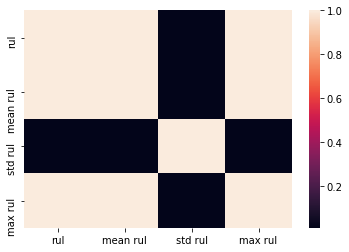

In [312]:
RUL = pd.DataFrame({'rul': rul})
rul_engineer = moving_stats(RUL, ['rul'])
corr = rul_engineer.corr()
print(corr)
sns.heatmap(corr)

In [318]:
all_engineer = pd.concat([rul_engineer, df_engineer], axis = 1)
all_corr = all_engineer.corr()
all_corr = np.abs(all_corr)
top_corr = all_corr.nlargest(13, 'rul')
top_feature = top_corr.index[3:]
print('Top 10 most correlated features:\n', top_feature.values)

Top 10 most correlated features:
 ['max sensor measurement 13' 'mean operational setting 3'
 'mean operational setting 2' 'std sensor measurement 11'
 'max operational setting 1' 'std sensor measurement 3'
 'std sensor measurement 17' 'std sensor measurement 9'
 'std sensor measurement 21' 'std sensor measurement 20']


### e.

In [321]:
reg = RandomForestRegressor()
reg.fit(all_engineer.iloc[:, 4:], all_engineer['rul'])
importance = reg.feature_importances_
importance_df = pd.DataFrame({'importance': importance}, index = all_engineer.iloc[:, 4:].columns)
importance_df = importance_df.sort_values(by = 'importance')
importance_index = importance_df.index[:10]
print('Top 10 most important features:\n', importance_index.values)

Top 10 most important features:
 ['max sensor measurement 16' 'max sensor measurement 19'
 'sensor measurement 19' 'sensor measurement 16' 'sensor measurement 5'
 'sensor measurement 6' 'sensor measurement 10' 'sensor measurement 18'
 'max operational setting 3' 'sensor measurement 1']


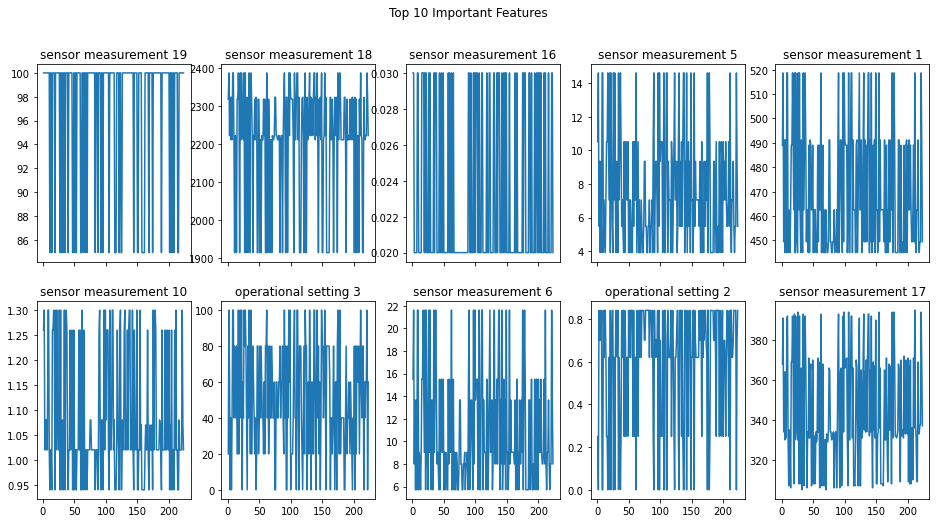

In [278]:
fig, axes = plt.subplots(2, 5, figsize = (16, 8), sharex = True)
plt.suptitle('Top 10 Important Features')
for i in range(len(importance_index)):
    x = i//5
    y = i%5
    axes[x, y].plot(target['time in cycles'], target[importance_index[i]])
    axes[x, y].set_title(importance_index[i])

## 

In [33]:
job = np.array(range(1, 21))
processing = np.array([10, 10, 13, 4, 9, 4, 8, 15, 7, 1, 9, 3, 15, 9, 11, 6, 5, 14, 18, 3])
due = np.array([50, 38, 49, 12, 20, 105, 73, 45, 6, 64, 15, 6, 92, 43, 78, 21, 15, 50, 150, 99])
weight = np.array([10, 5, 1, 5, 10, 1, 5, 10, 5, 1, 5, 10, 10, 5, 1, 10, 5, 5, 1, 5])
data_dict = {}
for i in job:
    data_dict[i] = {'weight': weight[i-1],
                    'processing_time': processing[i-1],
                    'due_date': due[i-1]}
data_df = pd.DataFrame(dict(processing_time = processing, due_date = due, weight = weight))

### b.

In [2]:
class TS():
    def __init__(self, data, tabu_tenure):
        self.tabu_tenure = tabu_tenure
        self.instance_dict = data
        self.Initial_solution = self.get_InitialSolution()
        self.tabu_str, self.Best_solution, self.Best_objvalue = self.TSearch()

    def get_tabuestructure(self):
        dict = {}
        for swap in combinations(self.instance_dict.keys(), 2):
            dict[swap] = {'tabu_time': 0, 'MoveValue': 0}
        return dict

    def get_InitialSolution(self):
        n_jobs = len(self.instance_dict)
        initial_solution = list(range(1, n_jobs+1))
        random.shuffle(initial_solution)
        return initial_solution

    def Objfun(self, solution):
        dict = self.instance_dict
        t = 0 
        objfun_value = 0
        for job in solution:
            C_i = t + dict[job]["processing_time"] 
            d_i = dict[job]["due_date"] 
            T_i = max(0, C_i - d_i)
            W_i = dict[job]["weight"] 

            objfun_value +=  W_i * T_i
            t = C_i
        return objfun_value

    def SwapMove(self, solution, i ,j):
        solution = solution.copy()
        i_index = solution.index(i)
        j_index = solution.index(j)
        solution[i_index], solution[j_index] = solution[j_index], solution[i_index]
        return solution

    def TSearch(self):
        # Parameters:
        tenure = self.tabu_tenure
        tabu_structure = self.get_tabuestructure()  # Initialize the data structures
        best_solution = self.Initial_solution
        best_objvalue = self.Objfun(best_solution)
        current_solution = self.Initial_solution
        current_objvalue = self.Objfun(current_solution)

        print("Tenure {}, Initial Objvalue: {}".format(tenure, current_objvalue))
        iter = 1
        Terminate = 0
        while Terminate < 100:
            print('\niter {}:\nCurrent_Objvalue: {}, Best_Objvalue: {}'.format(iter, current_objvalue, best_objvalue))
            # Searching the whole neighborhood of the current solution:
            for move in tabu_structure:
                candidate_solution = self.SwapMove(current_solution, move[0], move[1])
                candidate_objvalue = self.Objfun(candidate_solution)
                tabu_structure[move]['MoveValue'] = candidate_objvalue

            # Admissible move
            while True:
                # select the move with the lowest ObjValue in the neighborhood (minimization)
                best_move = min(tabu_structure, key = lambda x: tabu_structure[x]['MoveValue'])
                MoveValue = tabu_structure[best_move]["MoveValue"]
                tabu_time = tabu_structure[best_move]["tabu_time"]
                # Not Tabu
                if tabu_time < iter:
                    # make the move
                    current_solution = self.SwapMove(current_solution, best_move[0], best_move[1])
                    current_objvalue = self.Objfun(current_solution)
                    # Best Improving move
                    if MoveValue < best_objvalue:
                        best_solution = current_solution
                        best_objvalue = current_objvalue
                        print("best_move: {}, Objvalue: {} => Best Improving => Admissible".format(best_move,
                                                                                                      current_objvalue))
                        Terminate = 0
                    else:
                        print("Termination: {}## best_move: {}, Objvalue: {} => non-improving => "
                              "Admissible".format(Terminate, best_move, current_objvalue))
                        Terminate += 1
                    # update tabu_time for the move
                    tabu_structure[best_move]['tabu_time'] = iter + tenure
                    iter += 1
                    break
                # If tabu
                else:
                    # Aspiration
                    if MoveValue < best_objvalue:
                        # make the move
                        current_solution = self.SwapMove(current_solution, best_move[0], best_move[1])
                        current_objvalue = self.Objfun(current_solution)
                        best_solution = current_solution
                        best_objvalue = current_objvalue
                        print("best_move: {}, Objvalue: {} => Aspiration => Admissible".format(best_move,
                                                                                                      current_objvalue))
                        Terminate = 0
                        iter += 1
                        break
                    else:
                        tabu_structure[best_move]["MoveValue"] = float('inf')
                        print("best_move: {}, Objvalue: {} => Tabu => Inadmissible".format(best_move, current_objvalue))
                        continue
        print('#'*20 , "Performed iterations: {}".format(iter), "Best found Solution: {} , Objvalue: {}".format(best_solution,best_objvalue), sep="\n")
        return tabu_structure, best_solution, best_objvalue

In [27]:
ts2 = TS(data_dict, tabu_tenure = 2)

Tenure 2, Initial Objvalue: 6422

iter 1:
Current_Objvalue: 6422, Best_Objvalue: 6422
best_move: (4, 19), Objvalue: 5294 => Best Improving => Admissible

iter 2:
Current_Objvalue: 5294, Best_Objvalue: 5294
best_move: (13, 16), Objvalue: 4170 => Best Improving => Admissible

iter 3:
Current_Objvalue: 4170, Best_Objvalue: 4170
best_move: (5, 18), Objvalue: 3135 => Best Improving => Admissible

iter 4:
Current_Objvalue: 3135, Best_Objvalue: 3135
best_move: (4, 7), Objvalue: 2855 => Best Improving => Admissible

iter 5:
Current_Objvalue: 2855, Best_Objvalue: 2855
best_move: (5, 12), Objvalue: 2630 => Best Improving => Admissible

iter 6:
Current_Objvalue: 2630, Best_Objvalue: 2630
best_move: (6, 14), Objvalue: 2436 => Best Improving => Admissible

iter 7:
Current_Objvalue: 2436, Best_Objvalue: 2436
best_move: (5, 14), Objvalue: 2236 => Best Improving => Admissible

iter 8:
Current_Objvalue: 2236, Best_Objvalue: 2236
best_move: (1, 20), Objvalue: 2058 => Best Improving => Admissible

iter 9

best_move: (4, 17), Objvalue: 1928 => Tabu => Inadmissible
Termination: 76## best_move: (5, 16), Objvalue: 1928 => non-improving => Admissible

iter 93:
Current_Objvalue: 1928, Best_Objvalue: 1928
best_move: (4, 17), Objvalue: 1928 => Tabu => Inadmissible
best_move: (5, 16), Objvalue: 1928 => Tabu => Inadmissible
Termination: 77## best_move: (10, 14), Objvalue: 1928 => non-improving => Admissible

iter 94:
Current_Objvalue: 1928, Best_Objvalue: 1928
Termination: 78## best_move: (4, 17), Objvalue: 1928 => non-improving => Admissible

iter 95:
Current_Objvalue: 1928, Best_Objvalue: 1928
best_move: (4, 17), Objvalue: 1928 => Tabu => Inadmissible
Termination: 79## best_move: (5, 16), Objvalue: 1928 => non-improving => Admissible

iter 96:
Current_Objvalue: 1928, Best_Objvalue: 1928
best_move: (4, 17), Objvalue: 1928 => Tabu => Inadmissible
best_move: (5, 16), Objvalue: 1928 => Tabu => Inadmissible
Termination: 80## best_move: (10, 14), Objvalue: 1928 => non-improving => Admissible

iter 97

In [26]:
ts10 = TS(data_dict, tabu_tenure = 10)

Tenure 100, Initial Objvalue: 5296

iter 1:
Current_Objvalue: 5296, Best_Objvalue: 5296
best_move: (6, 12), Objvalue: 3740 => Best Improving => Admissible

iter 2:
Current_Objvalue: 3740, Best_Objvalue: 3740
best_move: (2, 4), Objvalue: 3211 => Best Improving => Admissible

iter 3:
Current_Objvalue: 3211, Best_Objvalue: 3211
best_move: (7, 16), Objvalue: 2681 => Best Improving => Admissible

iter 4:
Current_Objvalue: 2681, Best_Objvalue: 2681
best_move: (17, 20), Objvalue: 2406 => Best Improving => Admissible

iter 5:
Current_Objvalue: 2406, Best_Objvalue: 2406
best_move: (2, 15), Objvalue: 2195 => Best Improving => Admissible

iter 6:
Current_Objvalue: 2195, Best_Objvalue: 2195
best_move: (9, 14), Objvalue: 2115 => Best Improving => Admissible

iter 7:
Current_Objvalue: 2115, Best_Objvalue: 2115
best_move: (1, 9), Objvalue: 2065 => Best Improving => Admissible

iter 8:
Current_Objvalue: 2065, Best_Objvalue: 2065
best_move: (6, 19), Objvalue: 2033 => Best Improving => Admissible

iter 

best_move: (9, 10), Objvalue: 2072 => Tabu => Inadmissible
best_move: (13, 14), Objvalue: 2072 => Tabu => Inadmissible
best_move: (2, 18), Objvalue: 2072 => Tabu => Inadmissible
best_move: (7, 11), Objvalue: 2072 => Tabu => Inadmissible
best_move: (7, 14), Objvalue: 2072 => Tabu => Inadmissible
best_move: (16, 17), Objvalue: 2072 => Tabu => Inadmissible
best_move: (2, 6), Objvalue: 2072 => Tabu => Inadmissible
best_move: (4, 12), Objvalue: 2072 => Tabu => Inadmissible
best_move: (15, 19), Objvalue: 2072 => Tabu => Inadmissible
best_move: (5, 17), Objvalue: 2072 => Tabu => Inadmissible
best_move: (8, 9), Objvalue: 2072 => Tabu => Inadmissible
best_move: (13, 20), Objvalue: 2072 => Tabu => Inadmissible
best_move: (3, 15), Objvalue: 2072 => Tabu => Inadmissible
best_move: (8, 10), Objvalue: 2072 => Tabu => Inadmissible
best_move: (11, 14), Objvalue: 2072 => Tabu => Inadmissible
best_move: (10, 11), Objvalue: 2072 => Tabu => Inadmissible
best_move: (3, 19), Objvalue: 2072 => Tabu => Inadmi

best_move: (9, 11), Objvalue: 2473 => Tabu => Inadmissible
best_move: (2, 9), Objvalue: 2473 => Tabu => Inadmissible
best_move: (9, 18), Objvalue: 2473 => Tabu => Inadmissible
best_move: (1, 20), Objvalue: 2473 => Tabu => Inadmissible
best_move: (1, 2), Objvalue: 2473 => Tabu => Inadmissible
best_move: (10, 11), Objvalue: 2473 => Tabu => Inadmissible
best_move: (7, 18), Objvalue: 2473 => Tabu => Inadmissible
best_move: (9, 10), Objvalue: 2473 => Tabu => Inadmissible
best_move: (9, 20), Objvalue: 2473 => Tabu => Inadmissible
best_move: (5, 11), Objvalue: 2473 => Tabu => Inadmissible
best_move: (10, 20), Objvalue: 2473 => Tabu => Inadmissible
best_move: (1, 8), Objvalue: 2473 => Tabu => Inadmissible
best_move: (2, 10), Objvalue: 2473 => Tabu => Inadmissible
best_move: (8, 10), Objvalue: 2473 => Tabu => Inadmissible
best_move: (2, 8), Objvalue: 2473 => Tabu => Inadmissible
best_move: (7, 10), Objvalue: 2473 => Tabu => Inadmissible
best_move: (2, 14), Objvalue: 2473 => Tabu => Inadmissible

best_move: (9, 20), Objvalue: 2419 => Tabu => Inadmissible
best_move: (9, 10), Objvalue: 2419 => Tabu => Inadmissible
best_move: (11, 20), Objvalue: 2419 => Tabu => Inadmissible
best_move: (9, 18), Objvalue: 2419 => Tabu => Inadmissible
best_move: (9, 14), Objvalue: 2419 => Tabu => Inadmissible
best_move: (3, 6), Objvalue: 2419 => Tabu => Inadmissible
best_move: (2, 9), Objvalue: 2419 => Tabu => Inadmissible
best_move: (10, 20), Objvalue: 2419 => Tabu => Inadmissible
best_move: (3, 9), Objvalue: 2419 => Tabu => Inadmissible
best_move: (8, 20), Objvalue: 2419 => Tabu => Inadmissible
best_move: (2, 20), Objvalue: 2419 => Tabu => Inadmissible
best_move: (1, 14), Objvalue: 2419 => Tabu => Inadmissible
best_move: (1, 8), Objvalue: 2419 => Tabu => Inadmissible
Termination: 85## best_move: (11, 18), Objvalue: 2394 => non-improving => Admissible

iter 105:
Current_Objvalue: 2394, Best_Objvalue: 1928
best_move: (9, 20), Objvalue: 2394 => Tabu => Inadmissible
best_move: (11, 20), Objvalue: 2394 

In [25]:
best_solution = ts10.Best_solution
best_value = ts10.Best_objvalue
print('Best Solution: ', *best_solution, '\nBest Fitness: ', best_value, '\nTraining Time: ', '0.5 Second')

Best Solution:  12 4 5 16 17 9 8 1 10 14 7 13 20 11 2 18 6 15 3 19 
Best Fitness:  1928 
Training Time:  0.5 Second


In [23]:
t = 0 
tardy = 0
for job in best_solution:
    C_i = t + data_dict[job]["processing_time"] 
    d_i = data_dict[job]["due_date"] 
    T_i = max(0, C_i - d_i)
    if T_i != 0:
        tardy += 1
    t = C_i
print('Number of Tardiness: ', tardy)

Number of Tardiness:  14


### c.

In [70]:
def initial_population(population_size, num_job):
    population_list = []
    for i in range(population_size):
        random_num = list(np.random.permutation(num_job)) 
        # generate a random permutation of 0 to num_job-1
        population_list.append(random_num) # add to the population_list
    return population_list

def crossover(num_iteration, population_list, population_size, parent_list, offspring_list, S, num_job):
    S = list(np.random.permutation(population_size)) # generate a random sequence to select the parent chromosome to crossover
    for m in range(int(population_size/2)):
        crossover_prob = np.random.rand()
        if crossover_rate >= crossover_prob:
            parent_1 = population_list[S[2*m]][:]
            parent_2 = population_list[S[2*m+1]][:]
            child_1 = ['na' for i in range(num_job)]
            child_2 = ['na' for i in range(num_job)]
            fix_num = round(num_job/2)
            g_fix = list(np.random.choice(num_job, fix_num, replace = False))

            for g in range(fix_num):
                child_1[g_fix[g]]=parent_2[g_fix[g]]
                child_2[g_fix[g]]=parent_1[g_fix[g]]
            c1=[parent_1[i] for i in range(num_job) if parent_1[i] not in child_1]
            c2=[parent_2[i] for i in range(num_job) if parent_2[i] not in child_2]

            for i in range(num_job-fix_num):
                child_1[child_1.index('na')]=c1[i]
                child_2[child_2.index('na')]=c2[i]
            offspring_list[S[2*m]]=child_1[:]
            offspring_list[S[2*m+1]]=child_2[:]
    return parent_list, offspring_list

def mutation(offspring_list, mutation_selection_rate, mutation_rate, num_job):
    num_mutation_jobs = round(num_job*mutation_selection_rate)
    for m in range(len(offspring_list)):
        mutation_prob=np.random.rand()
        if mutation_rate >= mutation_prob:
            m_chg=list(np.random.choice(num_job, num_mutation_jobs, replace=False)) # chooses the position to mutation
            t_value_last=offspring_list[m][m_chg[0]] # save the value which is on the first mutation position
            for i in range(num_mutation_jobs-1):
                offspring_list[m][m_chg[i]]=offspring_list[m][m_chg[i+1]] # displacement
            
            offspring_list[m][m_chg[num_mutation_jobs-1]]=t_value_last # move the value of the first mutation position to the last mutation position
    return offspring_list  

def fitness(data_df, parent_list, offspring_list, num_job):
    p = data_df.processing_time
    d = data_df.due_date
    w = data_df.weight
    total_chromosome = parent_list.copy() + offspring_list.copy() # parent and offspring chromosomes combination
    chrom_fitness, chrom_fit = [], []
    total_fitness=0
    for i in range(population_size*2):
        ptime=0
        tardiness=0
        for j in range(num_job):
            ptime=ptime+p[total_chromosome[i][j]]
            tardiness=tardiness+w[total_chromosome[i][j]]*max(ptime-d[total_chromosome[i][j]],0)
        chrom_fitness.append(1/tardiness)
        chrom_fit.append(tardiness)
        total_fitness=total_fitness+chrom_fitness[i]
    return chrom_fitness, chrom_fit, total_fitness, total_chromosome

def selection(population_size, chrom_fitness, total_fitness, population_list, total_chromosome):
    pk = []
    qk = []
    for i in range(population_size*2):
        pk.append(chrom_fitness[i]/total_fitness)
    for i in range(population_size*2):
        cumulative=0
        for j in range(0,i+1):
            cumulative=cumulative+pk[j]
        qk.append(cumulative)

    selection_rand=[np.random.rand() for i in range(population_size)]

    for i in range(population_size):
        if selection_rand[i]<=qk[0]:
            population_list[i]=total_chromosome[0].copy()
        else:
            for j in range(0,population_size*2-1):
                if selection_rand[i]>qk[j] and selection_rand[i]<=qk[j+1]:
                    population_list[i]=total_chromosome[j+1].copy()
                    break
    return population_list


def GA(data_df, num_job, population_size, crossover_rate, mutation_rate, mutation_selection_rate, num_iteration):
    '''----- generate initial population -----'''
    Tbest = 99999
    best_list = []
    best_obj = []
    population_list = initial_population(population_size, num_job)

    for n in range(num_iteration):
        Tbest_now = 99999          
        '''-------- crossover --------'''
        parent_list = population_list.copy()
        offspring_list = population_list.copy()
        parent_list, offspring_list = crossover(num_iteration, population_list, population_size, parent_list, offspring_list, S,
                                                num_job)

        '''--------mutation--------'''   
        offspring_list = mutation(offspring_list, mutation_selection_rate, mutation_rate, num_job)

        '''--------fitness value(calculate tardiness)-------------'''
        chrom_fitness, chrom_fit, total_fitness, total_chromosome = fitness(data_df, parent_list, offspring_list, num_job)

        '''----------selection----------'''
        population_list = selection(population_size, chrom_fitness, total_fitness, population_list, total_chromosome)
                        
        '''----------comparison----------'''
        for i in range(population_size*2):
            if chrom_fit[i]<Tbest_now:
                Tbest_now=chrom_fit[i]
                sequence_now=copy.deepcopy(total_chromosome[i])

        if Tbest_now<=Tbest:
            Tbest=Tbest_now
            sequence_best=copy.deepcopy(sequence_now)

        job_sequence_ptime=0
        num_tardy=0
        for k in range(num_job):
            job_sequence_ptime=job_sequence_ptime+p[sequence_best[k]]
            if job_sequence_ptime>d[sequence_best[k]]:
                num_tardy=num_tardy+1
    '''----------result----------'''
    print("optimal sequence",sequence_best)
    print("optimal value:%f"%Tbest)
    print("average tardiness:%f"%(Tbest/num_job))
    print("number of tardy:%d"%num_tardy)

In [73]:
##### num_iteration = 100 #####
param_dict = dict(
    data_df = data_df,
    num_job = len(data_df),
    population_size = 30,
    crossover_rate = 0.8,
    mutation_rate = 0.2,
    mutation_selection_rate = 0.5,
    num_iteration = 100
)

GA(**param_dict)

optimal sequence [3, 15, 19, 16, 13, 11, 18, 2, 9, 0, 12, 7, 14, 6, 10, 8, 5, 1, 17, 4]
optimal value:2406.000000
average tardiness:120.300000
number of tardy:13


In [74]:
##### num_iteration = 500 #####
param_dict = dict(
    data_df = data_df,
    num_job = len(data_df),
    population_size = 30,
    crossover_rate = 0.8,
    mutation_rate = 0.2,
    mutation_selection_rate = 0.5,
    num_iteration = 500
)

GA(**param_dict)

optimal sequence [16, 4, 11, 3, 13, 8, 19, 6, 9, 0, 7, 12, 14, 15, 1, 10, 5, 2, 17, 18]
optimal value:2268.000000
average tardiness:113.400000
number of tardy:13


In [85]:
##### num_iteration = 2000 #####
param_dict = dict(
    data_df = data_df,
    num_job = len(data_df),
    population_size = 30,
    crossover_rate = 0.8,
    mutation_rate = 0.2,
    mutation_selection_rate = 0.5,
    num_iteration = 2000
)

GA(**param_dict)

optimal sequence [11, 4, 15, 16, 13, 19, 8, 12, 0, 6, 9, 7, 14, 1, 3, 10, 17, 5, 2, 18]
optimal value:2270.000000
average tardiness:113.500000
number of tardy:14


In [84]:
##### num_iteration = 5000 #####
param_dict = dict(
    data_df = data_df,
    num_job = len(data_df),
    population_size = 30,
    crossover_rate = 0.8,
    mutation_rate = 0.2,
    mutation_selection_rate = 0.5,
    num_iteration = 5000
)

GA(**param_dict)

optimal sequence [11, 4, 15, 16, 13, 19, 8, 12, 0, 6, 9, 7, 14, 1, 3, 10, 17, 5, 2, 18]
optimal value:2213.000000
average tardiness:110.650000
number of tardy:14


In [86]:
##### num_iteration = 5000, mutation_rate = 0.5 #####
param_dict = dict(
    data_df = data_df,
    num_job = len(data_df),
    population_size = 30,
    crossover_rate = 0.8,
    mutation_rate = 0.5,
    mutation_selection_rate = 0.5,
    num_iteration = 5000
)

GA(**param_dict)

optimal sequence [3, 15, 19, 16, 13, 11, 18, 2, 9, 0, 12, 7, 14, 6, 10, 8, 5, 1, 17, 4]
optimal value:2250.000000
average tardiness:112.500000
number of tardy:13


In [87]:
##### num_iteration = 5000, crossover_rate = 0.5 #####
param_dict = dict(
    data_df = data_df,
    num_job = len(data_df),
    population_size = 30,
    crossover_rate = 0.5,
    mutation_rate = 0.2,
    mutation_selection_rate = 0.5,
    num_iteration = 5000
)

GA(**param_dict)

optimal sequence [16, 4, 11, 6, 12, 9, 15, 13, 0, 17, 7, 3, 19, 1, 5, 10, 8, 14, 2, 18]
optimal value:2154.000000
average tardiness:107.700000
number of tardy:15


In [89]:
##### num_iteration = 5000, crossover_rate = 0.2 #####
param_dict = dict(
    data_df = data_df,
    num_job = len(data_df),
    population_size = 30,
    crossover_rate = 0.5,
    mutation_rate = 0.2,
    mutation_selection_rate = 0.5,
    num_iteration = 5000
)

GA(**param_dict)

optimal sequence [4, 11, 6, 12, 15, 9, 13, 16, 10, 5, 7, 0, 3, 1, 19, 17, 14, 2, 8, 18]
optimal value:2194.000000
average tardiness:109.700000
number of tardy:15


In [88]:
##### num_iteration = 5000, crossover_rate = 0.5, mutation_rate = 0.5 #####
param_dict = dict(
    data_df = data_df,
    num_job = len(data_df),
    population_size = 30,
    crossover_rate = 0.5,
    mutation_rate = 0.5,
    mutation_selection_rate = 0.5,
    num_iteration = 5000
)

GA(**param_dict)

optimal sequence [16, 4, 11, 15, 19, 9, 3, 13, 6, 8, 12, 1, 0, 7, 5, 10, 14, 2, 17, 18]
optimal value:2263.000000
average tardiness:113.150000
number of tardy:13
